## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


# Tasks

In [30]:
import pandas as pd
import seaborn as sns
import numpy as np

In [31]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Tasks/Task 2'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Tasks/Task 2


In [ ]:
df = pd.read_csv('Task 2/Task (2) Dataset.csv')

In [ ]:
df.head()

City             Datetime  TrafficIndexLive  JamsCount  JamsDelay  \
0  Abudhabi  2023-07-07 08:01:30                 6          4       15.6   
1  Abudhabi  2023-07-07 09:01:30                 7          7       20.5   
2  Abudhabi  2023-07-07 10:46:30                 7          8       25.0   
3  Abudhabi  2023-07-07 11:16:30                 8         11       30.6   
4  Abudhabi  2023-07-07 12:01:30                 8         20       62.1   

   JamsLength  TrafficIndexWeekAgo  TravelTimeHistoric  TravelTimeLive  
0         0.7                   13           59.611918       54.803617  
1         1.7                    8           60.221387       56.118629  
2         2.8                    6           59.161978       55.518834  
3         5.5                    6           59.738138       56.413917  
4         6.5                    5           58.958314       56.059246

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 66639 non-null  object 
 1   Datetime             66639 non-null  object 
 2   TrafficIndexLive     66639 non-null  int64  
 3   JamsCount            66639 non-null  int64  
 4   JamsDelay            66639 non-null  float64
 5   JamsLength           66639 non-null  float64
 6   TrafficIndexWeekAgo  66639 non-null  int64  
 7   TravelTimeHistoric   62772 non-null  float64
 8   TravelTimeLive       62772 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 4.6+ MB


## 1. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

<Axes: xlabel='TrafficIndexLive', ylabel='JamsDelay'>

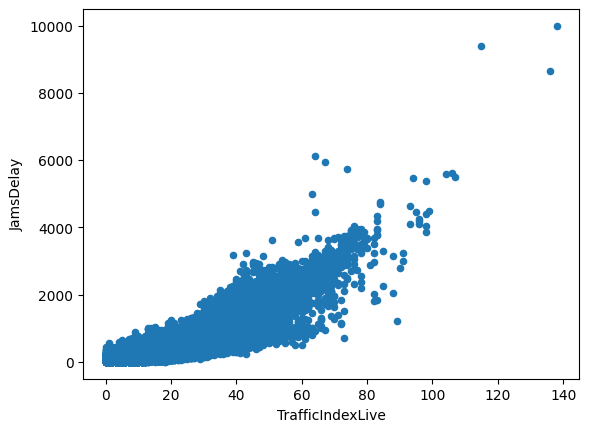

In [ ]:
df.plot.scatter(x='TrafficIndexLive', y='JamsDelay') #the outliers isn't removed!

<Axes: xlabel='JamsCount', ylabel='JamsDelay'>

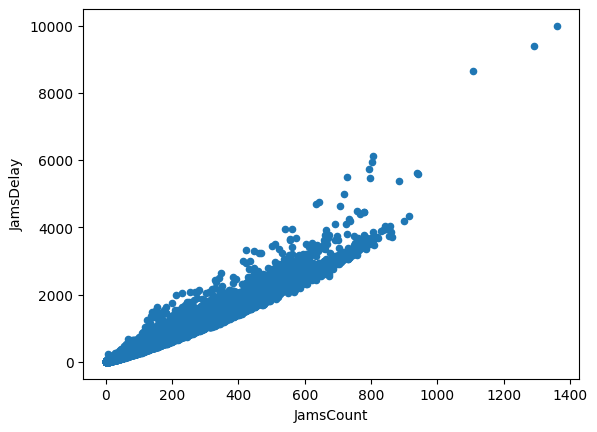

In [ ]:
df.plot.scatter(x='JamsCount', y='JamsDelay') #the outliers isn't removed!

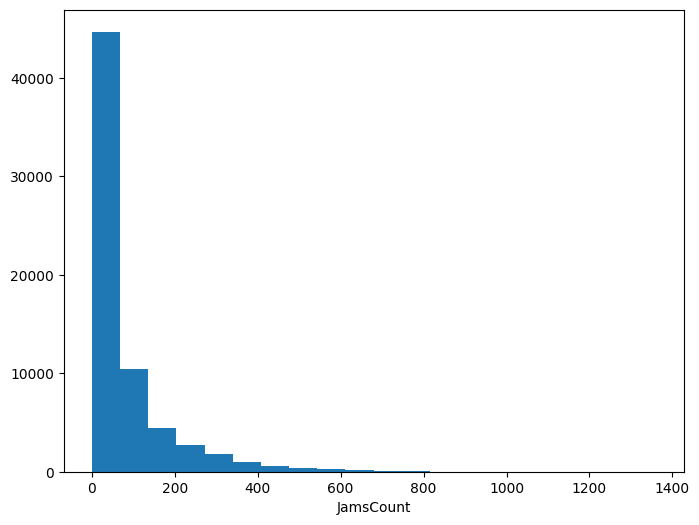

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(x=df.JamsCount,bins=20)
plt.xlabel('JamsCount')
plt.show()

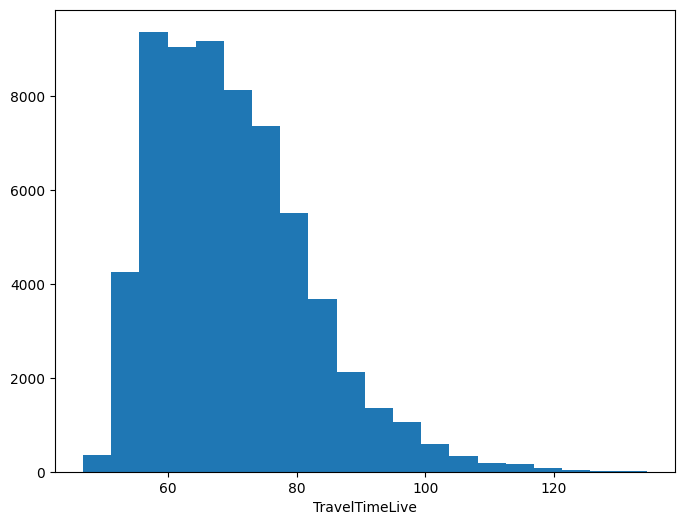

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(x=df.TravelTimeLive,bins=20)
plt.xlabel('TravelTimeLive')
plt.show()

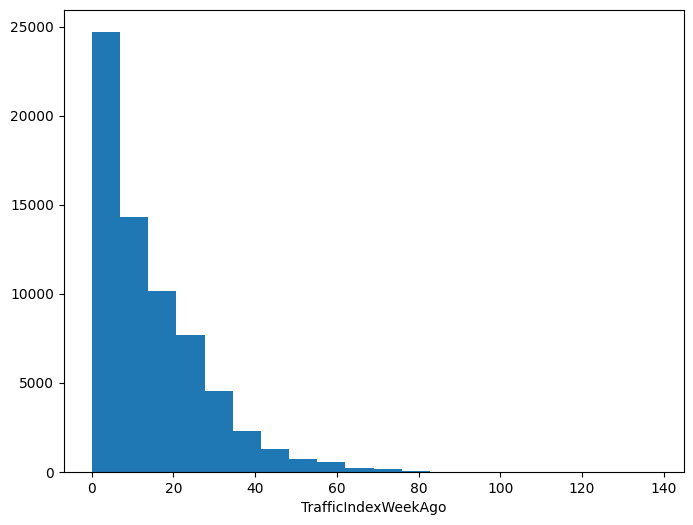

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(x=df.TrafficIndexWeekAgo,bins=20)
plt.xlabel('TrafficIndexWeekAgo')
plt.show()

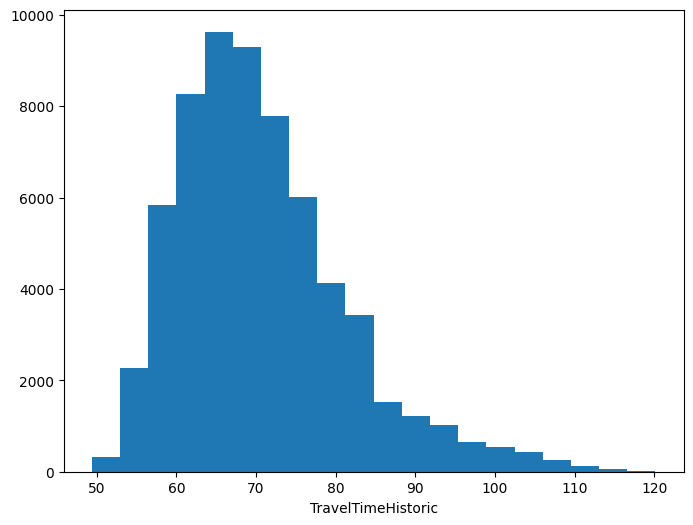

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(x=df.TravelTimeHistoric,bins=20)
plt.xlabel('TravelTimeHistoric')
plt.show()

In [ ]:
numerical_features = ['Number_of_vehicles_involved', 'Number_of_casualties', 'Casualty_severity']
for feature in numerical_features:
  plt.figure(figsize=(8,6))
  plt.hist(x=df[feature],bins=20)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.show()

In [ ]:
categorical_features = ['Day_of_week', 'Age_band_of_driver', 'Time', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Fitness_of_casuality', 'Cause_of_accident', 'Accident_severity']
for feature in categorical_features:
  plt.figure(figsize=(10, 6))
  df[feature].value_counts().plot(kind='bar')
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

### Identify and analyze patterns in the data.

In [33]:
df.head()

City             Datetime  TrafficIndexLive  JamsCount  JamsDelay  \
0  Abudhabi  2023-07-07 08:01:30                 6          4       15.6   
1  Abudhabi  2023-07-07 09:01:30                 7          7       20.5   
2  Abudhabi  2023-07-07 10:46:30                 7          8       25.0   
3  Abudhabi  2023-07-07 11:16:30                 8         11       30.6   
4  Abudhabi  2023-07-07 12:01:30                 8         20       62.1   

   JamsLength  TrafficIndexWeekAgo  TravelTimeHistoric  TravelTimeLive  
0         0.7                   13           59.611918       54.803617  
1         1.7                    8           60.221387       56.118629  
2         2.8                    6           59.161978       55.518834  
3         5.5                    6           59.738138       56.413917  
4         6.5                    5           58.958314       56.059246

### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

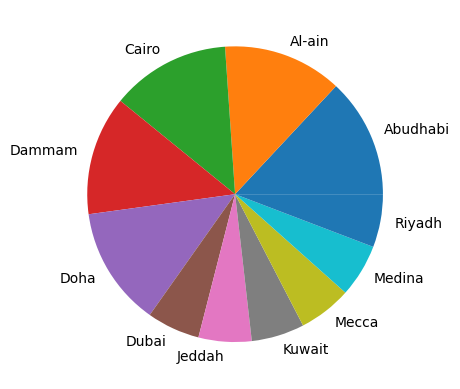

In [27]:
y = df['City'].value_counts()
labels = df['City'].unique()
y = df['City'].value_counts()
labels = df['City'].unique()
#.subset series
plt.pie(y, labels = labels)
plt.show()

## 3. Insights and Conclusions

positive correlation between jamesdelay and jams count
60 - 70 of travel  time live is more frequence


* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>